### 6COM1044 - Data Classification Coursework
- Marcelo Pedroza Hernandez
- UH Student ID: 23033126
- April 10, 2024

In [88]:
#Used Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Task 1 - Data Exploration (20 marks)
- In this task, you need to use Principal Component Analysis (PCA) to understand the characteristics of the datasets.

In [89]:
# Task 1 - (a)

# Load the training and test datasets
data_training = pd.read_csv("../mlnc_DATA/wdbc_training.csv")
data_test = pd.read_csv("../mlnc_DATA/wdbc_test.csv")

# Save the 30 features and the labels in separate variables for both datasets
data_training_labels = data_training.iloc[:, 1]
data_training_features = data_training.iloc[:, 2:32]
data_test_labels = data_test.iloc[:, 1]
data_test_features = data_test.iloc[:, 2:32]

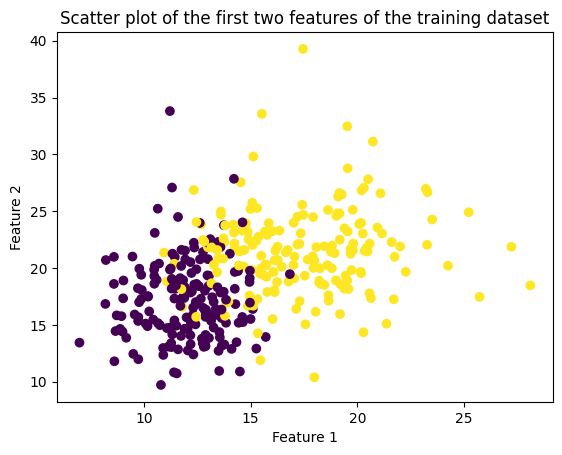

In [90]:
# Task 1 - (b)

# Show a scatter plot of the first two features of the training dataset
plt.scatter(data_training_features.iloc[:, 0], data_training_features.iloc[:, 1], c=data_training_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the first two features of the training dataset')
plt.show()

In [91]:
# Task 1 - (c)

# Normarlise the traing and test datasets using StandardScaler() from sklearn
normalised_training_features = StandardScaler().fit_transform(data_training_features)
normalised_test_features = StandardScaler().fit_transform(data_test_features)

# Report the mean and standard deviation for the first feature in the normalised test set
mean1 = np.mean(normalised_test_features[:, 0])
std1 = np.std(normalised_test_features[:, 0])
print(mean1)  # Near 0 = OK
print(std1)  # Near 1 (unit std) = OK 

-5.312071888158644e-17
0.9999999999999999


(360, 30)
[4.43606862e-01 1.91824039e-01 1.02551948e-01 5.85787475e-02
 4.96835548e-02 3.98816657e-02 2.25912562e-02 1.63373291e-02
 1.40936045e-02 1.14164312e-02 1.06760893e-02 9.00097065e-03
 7.86088289e-03 5.15507021e-03 3.23654164e-03 2.62141466e-03
 2.10410383e-03 1.92452722e-03 1.44303536e-03 1.12628084e-03
 9.75993691e-04 9.19406503e-04 6.95175730e-04 6.03693626e-04
 5.23470504e-04 2.52293483e-04 2.27284914e-04 5.53799241e-05
 2.83129826e-05 4.63331178e-06]
0.9999999999999998


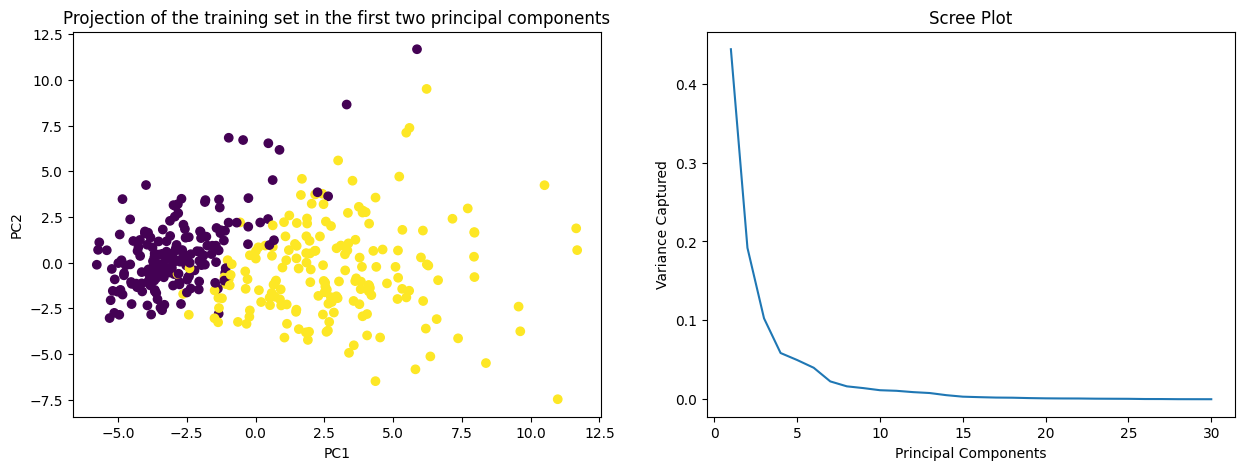

In [114]:
# Task 1 - (d)

# Perform a PCA analysis on the scaled training set
pca1 = PCA( )
projections_pca1 = pca1.fit_transform(normalised_training_features)
print(projections_pca1.shape)

# Report how much variance has been captured in the PCA analysis
variance_ratio = pca1.explained_variance_ratio_
variance_ratio_sum = np.sum(variance_ratio)
print(variance_ratio)  # The values are in descending order and represent the variance captured by each component
print(variance_ratio_sum)  # This value should be close to 1 (100%)

# Plots in one figure
figure, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(projections_pca1[:, 0], projections_pca1[:, 1], c=data_training_labels)  # Projection of the training set in PC1 and PC2
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Projection of the training set in the first two principal components')

ax[1].plot(range(1, 31), variance_ratio)  # Scree plot of the variance captured by each component
ax[1].set_xlabel('Principal Components')
ax[1].set_ylabel('Variance Captured')
ax[1].set_title('Scree Plot')

plt.show()
figure.savefig('Task1_D.png')